# 9. 텍스트마이닝 실습(RNN)

## 1) imdb 영화리뷰 분류

In [10]:
#https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
## IMDB 데이터셋(케라스에 내장된 데이터셋, 숫자로 전처리되어 있음, 17MB 정도의 데이터셋)
# 영화 리뷰 50,000개의 데이터셋
# 학습용 데이터 25,000개와 검증용 데이터 25,000개, 각각 50%는 부정, 50%는 긍정 리뷰로 구성

In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)
top_words = 5000 #상위 단어 5000개

#학습용,검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [2]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

# create the model
embedding_vecor_length = 32 #벡터사이즈 # 단어 1개 => 32벡터
model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist=model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64)

Epoch 1/10
16/16 [==============================] - 3s 41ms/step - loss: 0.6934 - accuracy: 0.5040
Epoch 2/10
16/16 [==============================] - 1s 37ms/step - loss: 0.6858 - accuracy: 0.6460
Epoch 3/10
16/16 [==============================] - 1s 38ms/step - loss: 0.6433 - accuracy: 0.8130
Epoch 4/10
16/16 [==============================] - 1s 38ms/step - loss: 0.5195 - accuracy: 0.8180
Epoch 5/10
16/16 [==============================] - 1s 38ms/step - loss: 0.3937 - accuracy: 0.8690
Epoch 6/10
16/16 [==============================] - 1s 39ms/step - loss: 0.3152 - accuracy: 0.8940
Epoch 7/10
16/16 [==============================] - 1s 37ms/step - loss: 0.1798 - accuracy: 0.9470
Epoch 8/10
16/16 [==============================] - 1s 38ms/step - loss: 0.1202 - accuracy: 0.9660
Epoch 9/10
16/16 [==============================] - 1s 41ms/step - loss: 0.0536 - accuracy: 0.9900
Epoch 10/10
16/16 [==============================] - 1s 37ms/step - loss: 0.0510 - accuracy: 0.9890


In [6]:
# Final evaluation of the model
scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 1s 13ms/step - loss: 0.0235 - accuracy: 0.9910
Accuracy: 99.10%


In [7]:
scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 0s 13ms/step - loss: 0.7416 - accuracy: 0.7610
Accuracy: 76.10%


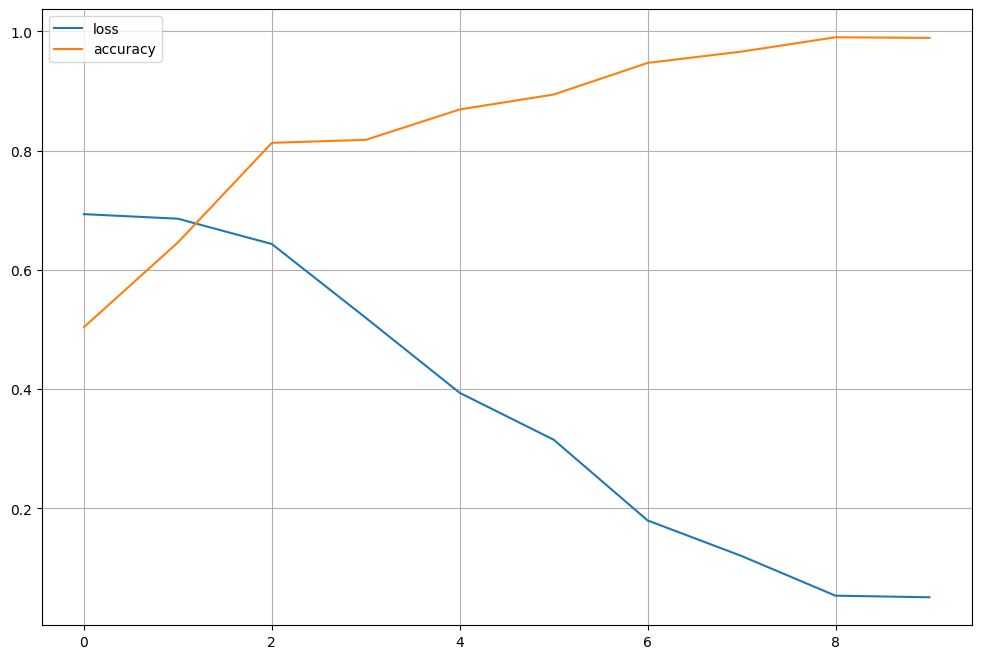

In [8]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

## 2) 로이터 뉴스 분류

In [9]:
# 뉴스 기사 분류: 다중 분류 문제
# 로이터 뉴스를 46개의 토픽으로 분류하는 신경망(다중분류)
# 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 데이터셋(케라스 내장 데이터셋)
# 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋
# 46개의 토픽, 각 토픽은 최소 10개의 샘플이 있음

In [1]:
from keras.datasets import reuters

#로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen  상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data( num_words=1000,test_split=0.2)

In [2]:
from tensorflow.keras.preprocessing import sequence

# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [3]:
from keras.utils import np_utils

#원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000,100)) #1000개의 단어가 입력되어 100차원으로 출력
# model.add(Embedding(1000,100), input_length=maxlen)

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(46, activation='softmax')) #46개의 뉴스 카테고리
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(patience=3)
hist=model.fit(X_train,y_train,batch_size=128,epochs=100,
               validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
57/57 [==============================] - 5s 27ms/step - loss: 2.7300 - accuracy: 0.3495 - val_loss: 2.3992 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 15ms/step - loss: 2.1848 - accuracy: 0.4547 - val_loss: 2.0687 - val_accuracy: 0.4880
Epoch 3/100
57/57 [==============================] - 1s 14ms/step - loss: 2.0308 - accuracy: 0.4992 - val_loss: 2.0131 - val_accuracy: 0.4992
Epoch 4/100
57/57 [==============================] - 1s 14ms/step - loss: 1.9452 - accuracy: 0.5138 - val_loss: 1.8434 - val_accuracy: 0.5403
Epoch 5/100
57/57 [==============================] - 1s 14ms/step - loss: 1.7277 - accuracy: 0.5698 - val_loss: 1.7255 - val_accuracy: 0.5815
Epoch 6/100
57/57 [==============================] - 1s 15ms/step - loss: 1.6062 - accuracy: 0.6086 - val_loss: 1.6119 - val_accuracy: 0.5977
Epoch 7/100
57/57 [==============================] - 1s 15ms/step - loss: 1.5185 - accuracy: 0.6248 - val_loss: 1.6154 - val_accuracy: 0.6027
Epoch 

In [7]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.5350 - accuracy: 0.6167

 정확도 : 0.6167


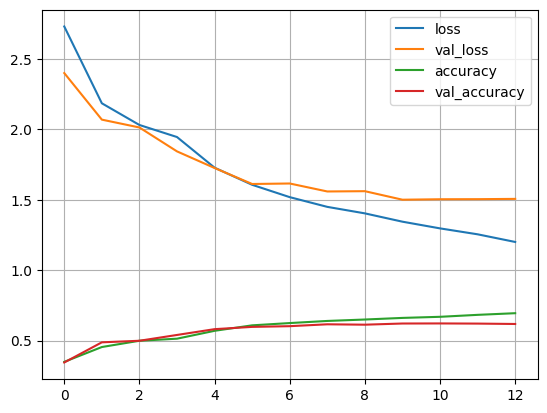

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [9]:
import numpy as np

pred=model.predict(X_test)
np.argmax(pred[12])

71/71 [==============================] - 1s 4ms/step


1

In [10]:
np.argmax(y_test[12])

1

## 3) 스팸메일 분류

In [11]:
#https://wikidocs.net/22894
#https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd

df = pd.read_csv('./data/spam/spam.csv',encoding='latin1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# ham => 0, spam => 1 로 바꾸어 저장
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

v1
0    4825
1     747
Name: count, dtype: int64


<Axes: xlabel='v1'>

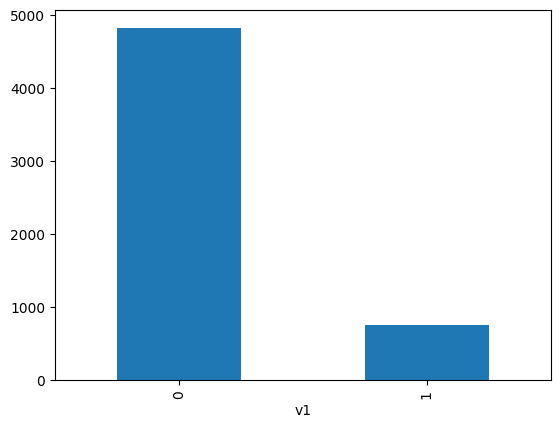

In [4]:
print(df['v1'].value_counts())
df['v1'].value_counts().plot(kind='bar')

In [5]:
X=df[['v2']] #독립변수
y=df['v1'] #종속변수

print(X[:3])
print(y[:3])

                                                  v2
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
0    0
1    0
2    1
Name: v1, dtype: int64


v1
0    747
1    747
Name: count, dtype: int64


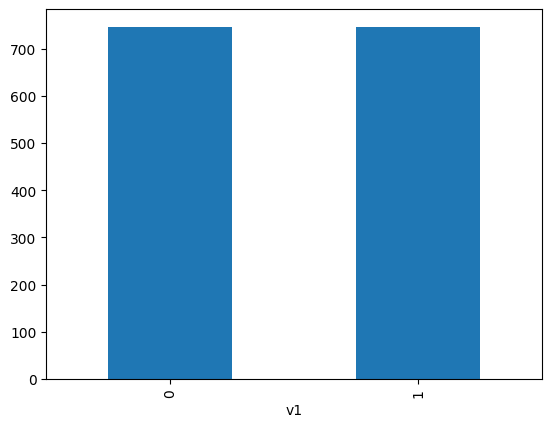

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y) # X 2차원으로 넣어야함

X_samp = pd.DataFrame(data=X_sample,columns=['v2'] )
y_samp = pd.DataFrame(data=y_sample,columns=['v1'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

print(df_samp['v1'].value_counts())

df_samp['v1'].value_counts().plot(kind='bar')

X = df_samp['v2']
y = df_samp['v1']

In [7]:
from keras.preprocessing.text import Tokenizer

#단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

#텍스트를 시퀀스로 변환(단어의 인덱스로만 구성된 새로운 리스트)
sequences = tokenizer.texts_to_sequences(X)

print(sequences[:5])

[[1486, 49, 801, 1487, 18, 336, 87, 26, 2274, 45, 27, 173], [1148, 14, 4, 25, 613], [174, 149, 4, 2, 189, 5, 105, 17, 614, 613], [946, 88, 38, 399, 702, 1, 2275, 1488, 130, 2276, 26, 1489, 242, 45, 702, 1, 2277, 2278, 24, 46, 1149], [7, 291, 1490, 802, 553, 53, 316, 26, 803, 703, 25, 63, 47, 217, 1491, 13, 434, 337, 97]]


In [8]:
#단어와 인덱스 목록
word_to_index = tokenizer.word_index

for idx,word in enumerate(word_to_index):
    print(idx+1,word,end=',')

    if idx>8:
        break

1 to,2 you,3 a,4 call,5 i,6 the,7 u,8 your,9 for,10 is,

메일의 최대 길이 : 77
19.846050870147256


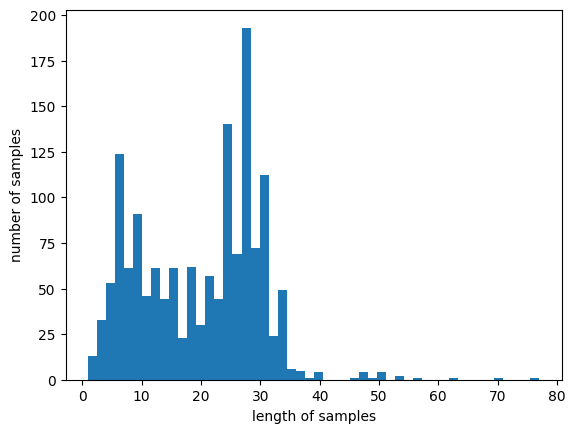

In [9]:
import matplotlib.pyplot as plt

X_data = sequences

print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print(sum(map(len, X_data))/len(X_data)) #메일의 평균 길이

plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples') # 길이
plt.ylabel('number of samples') # 샘플수
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#최대 사이즈에 맞추어 빈칸에 0으로 채움
data = pad_sequences(X_data, maxlen = 77)

print("학습용 데이터의 크기(shape): ", data.shape)
print(data[:1])

학습용 데이터의 크기(shape):  (1494, 77)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1486   49  801 1487   18
   336   87   26 2274   45   27  173]]


In [11]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=10)

In [12]:
from keras.layers import Embedding, Dense, LSTM, SimpleRNN
from keras.models import Sequential

model = Sequential()

# Embedding(입력사이즈,출력사이즈)
model.add(Embedding(len(word_to_index)+1, 32, input_length=77)) # 32 벡터수, 77 입력사이즈
model.add(SimpleRNN(32)) # output size 32

#model.add(LSTM(32)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 32)            149120    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 151,233
Trainable params: 151,233
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(X_train, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 6s 271ms/step - loss: 0.5828 - accuracy: 0.7510 - val_loss: 0.4922 - val_accuracy: 0.8243
Epoch 2/10
15/15 [==============================] - 4s 236ms/step - loss: 0.3951 - accuracy: 0.8881 - val_loss: 0.3951 - val_accuracy: 0.8452
Epoch 3/10
15/15 [==============================] - 3s 228ms/step - loss: 0.2898 - accuracy: 0.9236 - val_loss: 0.6757 - val_accuracy: 0.4979
Epoch 4/10
15/15 [==============================] - 4s 237ms/step - loss: 0.2135 - accuracy: 0.9351 - val_loss: 0.2481 - val_accuracy: 0.9414
Epoch 5/10
15/15 [==============================] - 4s 235ms/step - loss: 0.1479 - accuracy: 0.9718 - val_loss: 0.1748 - val_accuracy: 0.9623
Epoch 6/10
15/15 [==============================] - 3s 225ms/step - loss: 0.1229 - accuracy: 0.9780 - val_loss: 0.1806 - val_accuracy: 0.9665
Epoch 7/10
15/15 [==============================] - 4s 235ms/step - loss: 0.0776 - accuracy: 0.9885 - val_loss: 0.1280 - val_accuracy: 0.9665
Epoch 

In [15]:
model.evaluate(X_test, y_test.values, verbose=0)

[0.15236665308475494, 0.9498327970504761]

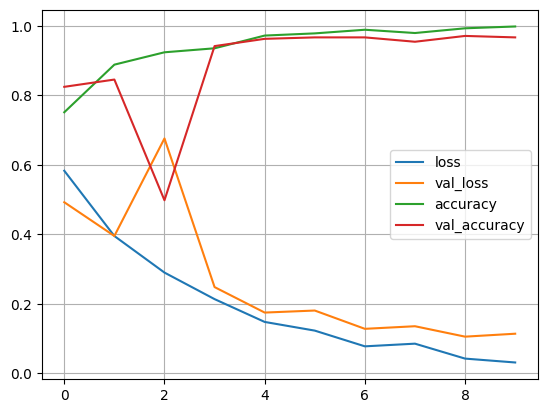

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [17]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 195ms/step


array([[0.92681086],
       [0.02292216],
       [0.9776944 ]], dtype=float32)

## 4) 한글텍스트 분류

In [18]:
import pandas as pd
train_data = pd.read_csv('./data/text/ratings_train.csv',encoding='ms949')
test_data = pd.read_csv('./data/text/ratings_test.csv',encoding='ms949')

In [19]:
len(train_data)

150000

In [20]:
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [21]:
len(test_data)

50000

In [22]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [23]:
# 중복되지 않은 데이터 확인
train_data['document'].nunique(), train_data['label'].nunique()

# 중복값이 약 4000개

(146157, 2)

In [24]:
#중복값 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

len(train_data)

146158

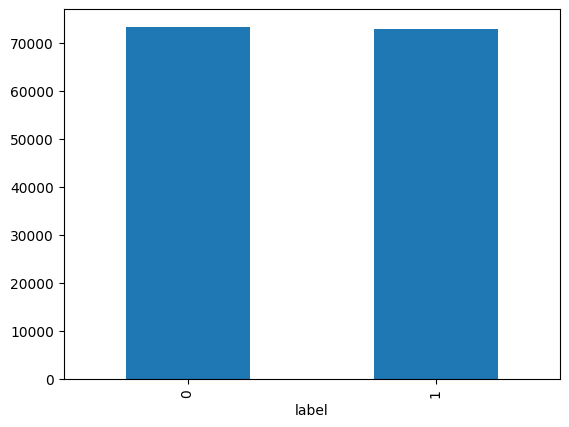

In [25]:
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')
plt.show()

In [26]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [28]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
train_data.isnull().values.any()

False

In [29]:
#특수문자,기호 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [31]:
import numpy as np

#공백 제거
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()


document    0
label       0
dtype: int64

In [32]:
train_data.loc[train_data.document.isnull()][:3]

,document,label


In [33]:
#null 샘플 제거
train_data = train_data.dropna(how = 'any')

len(train_data)

146157

In [34]:
# test_data에도 동일한 과정 적용
test_data.drop_duplicates(subset = ['document'], inplace=True)

test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

len(test_data)

49147

In [35]:
# 불용어 사전
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [36]:
from konlpy.tag import Okt

okt = Okt()
X_train = []  

#형태소 분석
#for sentence in train_data['document']:

for sentence in train_data['document'][:10000]:    
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [37]:
print(X_train[:3])

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [38]:
# 테스트 데이터에 대한 토큰화
X_test = []

#for sentence in test_data['document']:
for sentence in test_data['document'][:10000]:    
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)

In [40]:
# 출현빈도가 3회 미만인 단어들
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기
print(rare_cnt) #희귀단어수

13345
8891


In [42]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [43]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [44]:
# 토크나이저 백업
import joblib  
joblib.dump(tokenizer, './data/tokenizer.h5')

['tokenizer.h5']

In [45]:
print(X_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [46]:
# 너무 많아서 10000개씩만 하기로함 / X 10000로 줄였으니 y도 줄이기
y_train = np.array(train_data['label'][:10000])
y_test = np.array(test_data['label'][:10000])

In [47]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이
max_len

59

In [48]:
cnt = 0

for s in X_train:
  if(len(s) <= 30):
      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율
(cnt / len(X_train))*100



93.58

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [50]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100)) # word2vec 단어=>숫자 벡터 / 단어수, 차원(타임스텝)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid')) # 이진분류
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         445500    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 562,877
Trainable params: 562,877
Non-trainable params: 0
_________________________________________________________________


In [51]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('./data/RNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
122/125 [============================>.] - ETA: 0s - loss: 0.5782 - acc: 0.7312
Epoch 1: val_acc improved from -inf to 0.79850, saving model to RNN_model.h5
125/125 [==============================] - 5s 21ms/step - loss: 0.5752 - acc: 0.7327 - val_loss: 0.4364 - val_acc: 0.7985
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.3544 - acc: 0.8468
Epoch 2: val_acc improved from 0.79850 to 0.81850, saving model to RNN_model.h5
125/125 [==============================] - 2s 15ms/step - loss: 0.3544 - acc: 0.8468 - val_loss: 0.4304 - val_acc: 0.8185
Epoch 3/10
124/125 [============================>.] - ETA: 0s - loss: 0.3000 - acc: 0.8741
Epoch 3: val_acc did not improve from 0.81850
125/125 [==============================] - 2s 14ms/step - loss: 0.3011 - acc: 0.8739 - val_loss: 0.4174 - val_acc: 0.8100
Epoch 4/10
122/125 [============================>.] - ETA: 0s - loss: 0.2808 - acc: 0.8879
Epoch 4: val_acc did not improve from 0.81850
125/125 [============

In [52]:
loaded_model = load_model('./data/RNN_model.h5')
loaded_model.evaluate(X_test, y_test) 
# [손실, 정확도]

313/313 [==============================] - 3s 7ms/step - loss: 0.4307 - acc: 0.8129


[0.43073558807373047, 0.8129000067710876]

In [53]:
def review_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측

  if(score > 0.5):
    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")

  else:
    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [54]:
review_predict('연기는 잔잔하게 볼 만 합니다')

1/1 [==============================] - 0s 446ms/step
95.92% 확률로 긍정 리뷰입니다.



In [55]:
review_predict('영화의 주제가 뭔지 모르겠음')

1/1 [==============================] - 0s 29ms/step
89.12% 확률로 부정 리뷰입니다.



In [56]:
review_predict('익살스런 연기가 돋보였던 영화')

1/1 [==============================] - 0s 32ms/step
97.06% 확률로 긍정 리뷰입니다.



In [57]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 [==============================] - 0s 33ms/step
99.67% 확률로 부정 리뷰입니다.



## 6) 문장 만들기

In [1]:
# GPU 한번에 다 사용하지않고 필요한만큼만 사용하도록 해주는 코드
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
import pandas as pd

df=pd.read_csv('./data/text/ratings_all.csv',encoding='ms949')
df=df[df['label'] == 1] # 긍정리뷰만 선택
df=df.sample(frac=1) # frac=1 비율이 100%
df

,document,label
57393,간만에 긴장감 주는 좋은 영화다.,1
26671,미친 댓글 안남기려다 남긴다. 내 바로 아랫놈 진짜 웃긴놈이네. 지랑 안맞는 장르면...,1
148513,8점은되야한다 헥토르!!,1
182421,켄이치... 아 좋다 따뜻한영화다,1
162645,그림이 아름다운 영화 네요. 독립영화 답지 않게 정말 저예산으로 제작하였지만 훌륭한...,1
...,...,...
108796,진짜 개인적으로는 재밌게봤는데 왜케 반으이 안좋지ㅠㅠ,1
126695,막장스럽지만 즐겁게 풀어냈다고 생각했는데 평이 안좋네ㅋ 약간 블랙코미디 스럽기는 하다.,1
123181,무서운 미래다... 기발한소재다... 시대상 괜찮은 영화다.,1
181610,아드디어 우리동내 예체능이 농구로서 예능과체육의짜릿함을 동시에 보여주네요.. 그전에...,1


In [4]:
text='\n'.join(map(str,df['document'].values[10000:13000]))
text[:100]

"아, 정말 뭉클하면서 따뜻한 영화였어요, 딱 내가 좋아하는 스타일의 영화!! ㅋㅋ\n팀원의 2랜덤이 니피,실크일때 '난 자연인이다'를 외치며 총대를 맨게 인상적.\n배우들 연기도 좋고"

In [5]:
len(text)

105674

In [6]:
#정수 인코딩, 단어에 번호
from keras.preprocessing.text import Tokenizer

t=Tokenizer()
t.fit_on_texts([text])

vocab_size=len(t.word_index)+1
print(vocab_size) #단어 집합 사이즈

12568


In [7]:
# 불용어 처리 생략
t.word_index

{'영화': 1,
 '정말': 2,
 '너무': 3,
 '진짜': 4,
 '이': 5,
 '최고의': 6,
 '잘': 7,
 '수': 8,
 '드라마': 9,
 '그': 10,
 '더': 11,
 '봤는데': 12,
 '본': 13,
 '있는': 14,
 '영화를': 15,
 'ㅋㅋ': 16,
 '최고': 17,
 '재밌게': 18,
 '다시': 19,
 '이런': 20,
 '다': 21,
 '좋은': 22,
 '영화가': 23,
 '보고': 24,
 '역시': 25,
 '꼭': 26,
 '영화는': 27,
 '좀': 28,
 'ㅠㅠ': 29,
 'ㅋ': 30,
 'ㅎㅎ': 31,
 '보는': 32,
 '평점이': 33,
 '왜': 34,
 '내가': 35,
 '그리고': 36,
 'ㅠ': 37,
 '연기': 38,
 '한': 39,
 '가장': 40,
 '참': 41,
 '완전': 42,
 '아': 43,
 '것': 44,
 '좋다': 45,
 '내': 46,
 '넘': 47,
 '영화다': 48,
 '없다': 49,
 '난': 50,
 '10점': 51,
 '이거': 52,
 '많이': 53,
 '재밌다': 54,
 '하지만': 55,
 '굿': 56,
 '봐도': 57,
 '아름다운': 58,
 '그냥': 59,
 '보면': 60,
 '없는': 61,
 '마지막': 62,
 '감동': 63,
 '재미있게': 64,
 '말이': 65,
 '또': 66,
 '여운이': 67,
 '대한': 68,
 '특히': 69,
 '평점': 70,
 '볼': 71,
 '내내': 72,
 '하는': 73,
 '좋고': 74,
 '지금': 75,
 '오랜만에': 76,
 '아주': 77,
 '봤다': 78,
 '때': 79,
 'ㅋㅋㅋ': 80,
 '모두': 81,
 '이건': 82,
 '그래도': 83,
 '영화입니다': 84,
 '끝까지': 85,
 '와': 86,
 '봤습니다': 87,
 '이야기': 88,
 '있다': 89,
 '이렇게': 90,
 '함께': 91,
 

In [8]:
sequences=list()

for line in text.split('\n'): #문장 나누기
    encoded=t.texts_to_sequences([line])[0] #단어를 숫자로 변환
    
    for i in range(1,len(encoded)):
        sequence=encoded[:i+1]
        sequences.append(sequence)

print(len(sequences)) 

19955


In [9]:
sequences

[[43, 2],
 [43, 2, 2380],
 [43, 2, 2380, 206],
 [43, 2, 2380, 206, 600],
 [43, 2, 2380, 206, 600, 266],
 [43, 2, 2380, 206, 600, 266, 35],
 [43, 2, 2380, 206, 600, 266, 35, 207],
 [43, 2, 2380, 206, 600, 266, 35, 207, 2381],
 [43, 2, 2380, 206, 600, 266, 35, 207, 2381, 1],
 [43, 2, 2380, 206, 600, 266, 35, 207, 2381, 1, 16],
 [2382, 2383],
 [2382, 2383, 2384],
 [2382, 2383, 2384, 2385],
 [2382, 2383, 2384, 2385, 2386],
 [2382, 2383, 2384, 2385, 2386, 2387],
 [2382, 2383, 2384, 2385, 2386, 2387, 2388],
 [2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389],
 [2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390],
 [2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391],
 [179, 100],
 [179, 100, 74],
 [179, 100, 74, 2392],
 [179, 100, 74, 2392, 2393],
 [179, 100, 74, 2392, 2393, 267],
 [179, 100, 74, 2392, 2393, 267, 2394],
 [179, 100, 74, 2392, 2393, 267, 2394, 27],
 [179, 100, 74, 2392, 2393, 267, 2394, 27, 468],
 [1240, 469],
 [1240, 469, 1241],
 [1240, 469, 1241, 2396],
 [1240, 469, 

In [10]:
max_len=max(len(l) for l in sequences)
print(max_len) #문장의 최대 길이

39


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences=pad_sequences(sequences,maxlen=max_len,padding='pre')
sequences #제로패딩

array([[   0,    0,    0, ...,    0,   43,    2],
       [   0,    0,    0, ...,   43,    2, 2380],
       [   0,    0,    0, ...,    2, 2380,  206],
       ...,
       [   0,    0,    0, ...,    0,   64,    7],
       [   0,    0,    0, ...,   64,    7,   87],
       [   0,    0,    0, ...,    7,   87,   16]])

In [12]:
import numpy as np

sequences=np.array(sequences)

X=sequences[:, :-1]
y=sequences[:,-1]

In [13]:
from keras.utils import np_utils

#원핫인코딩
y=np_utils.to_categorical(y,num_classes=vocab_size) #vocab_size 단어수
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.layers import Embedding
from keras.optimizers import Adam

model=Sequential()
model.add(Embedding(vocab_size,500,input_length=max_len-1)) #단어수,벡터사이즈,입력사이즈
model.add(LSTM(128))
model.add(Dense(vocab_size,activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 500)           6284000   
                                                                 
 lstm (LSTM)                 (None, 128)               322048    
                                                                 
 dense (Dense)               (None, 12568)             1621272   
                                                                 
Total params: 8,227,320
Trainable params: 8,227,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
#메모리 부족으로 학습이 실패함
#model.fit(X,y,epochs=20)

In [16]:
import os
import glob

[os.remove(f) for f in glob.glob('*.h5')]

[]

In [17]:
import time
from keras.models import load_model

x_size=len(X)
n=800

for i in range(0,x_size,n):
    print('step ',int(i/n)+1,'/',int(x_size/n))
    
    X1=X[i:min(i + n, x_size)]
    y1=y[i:min(i + n, x_size)]    
    
    model.fit(X1,y1,batch_size=64,epochs=30, verbose=1)
    model.save(f'sentence{int(i/n)}.h5')    

    tf.keras.backend.clear_session() # 파라미터 초기화

    del model    
    time.sleep(2)
    model = load_model(f'sentence{int(i/n)}.h5')

step  1 / 24
Epoch 1/30
13/13 [==============================] - 6s 26ms/step - loss: 9.3844 - accuracy: 0.0175
Epoch 2/30
13/13 [==============================] - 0s 24ms/step - loss: 7.2694 - accuracy: 0.0250
Epoch 3/30
13/13 [==============================] - 0s 24ms/step - loss: 6.5795 - accuracy: 0.0250
Epoch 4/30
13/13 [==============================] - 0s 24ms/step - loss: 6.1555 - accuracy: 0.0262
Epoch 5/30
13/13 [==============================] - 0s 24ms/step - loss: 5.7164 - accuracy: 0.0262
Epoch 6/30
13/13 [==============================] - 0s 24ms/step - loss: 5.1488 - accuracy: 0.0388
Epoch 7/30
13/13 [==============================] - 0s 24ms/step - loss: 4.4005 - accuracy: 0.1275
Epoch 8/30
13/13 [==============================] - 0s 25ms/step - loss: 3.6271 - accuracy: 0.2512
Epoch 9/30
13/13 [==============================] - 0s 26ms/step - loss: 2.8477 - accuracy: 0.4638
Epoch 10/30
13/13 [==============================] - 0s 24ms/step - loss: 2.0957 - accuracy: 0.6

In [18]:
def sequence_generation(model,t,current_word,n):
    init_word=current_word
    sentence=''

    for _ in range(n):
        encoded=t.texts_to_sequences([current_word])[0]
        encoded=pad_sequences([encoded],maxlen=max_len-1,padding='pre') # 마지막 단어를 뺴야하기떄문에 -1
        pred=model.predict(encoded,verbose=0)
        result=np.argmax(pred,axis=1)

        # 중복단어가 나오면 끝내세요
        for word,index in t.word_index.items():
            if index==result:
                break

        current_word=current_word+' '+word
        sentence=sentence +' '+word

    sentence=init_word+sentence
    return sentence

In [19]:
print(sequence_generation(model,t,'너무',5))
print(sequence_generation(model,t,'진짜',5))
print(sequence_generation(model,t,'역시',5))
print(sequence_generation(model,t,'완전',5))
print(sequence_generation(model,t,'왜케',5))
print(sequence_generation(model,t,'오랜만에',5))
print(sequence_generation(model,t,'큰',5))
print(sequence_generation(model,t,'낭만적',5))
print(sequence_generation(model,t,'정말',5))

너무 재밌어요 ㅠ 감동 정도 영화는
진짜 좋아요 영화 영화의 주제는 길러준
역시 러셀 크로우는 군인 연기할 때가
완전 좋은데요 1편은 너무 비현실적이였어요 무기들이
왜케 유쾌하게 재밌네요 된 아름다운 영화
오랜만에 접한 수작 30대 중반 이상분들에게
큰 만점에 200점이다 풍자와 해학이 넘친다
낭만적 잼있다 주 가족들이랑 봤는데 발레단
정말 훌륭한 한국산 액션 블럭버스터 참으로


In [38]:
encoded=t.texts_to_sequences(['완전'])[0]
encoded=pad_sequences([encoded],maxlen=max_len-1,padding='pre')
encoded

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, 42]])

# 10. 텍스트마이닝 실습(CNN)

In [ ]:
# CNN 은 이미지에 보통 사용되며 텍스트에는 그렇게 많이 사용되지는 않음
# CNN : 이미지의 특징을 검출하는 기법

## 1) 기본예제

In [39]:
#합성곱
import numpy as np

w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

#w 배열을 뒤집어서 출력
w_r = np.flip(w)

print(w_r)

#합성곱 계산
# w_r을 x의 왼쪽 자리에 맞추고 각 인덱스마다 곱한 후 더함
# 2x3 + 8x5 + 3x1 + 7x2 = 63
# w_r을 오른쪽으로 한자리 shift하여 곱셈

for i in range(6):
    print(np.dot(x[i:i+4], w_r))

[3 5 1 2]
63
48
49
28
21
20


In [40]:
#사이파이에서 제공하는 합성곱 함수
#w를 뒤집어서 곱하는 방식

from scipy.signal import convolve

# valid - 원본 배열에 패딩을 추가하지 않는 방식
# 원본 이미지가 4x4인 경우 결과물이 3x3으로 줄어드는 방식

convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [41]:
#합성곱 신경망에서는 w를 뒤집지 않고 그대로 곱하는 교차상관 방식을 사용함
#초기 가중치값은 랜덤으로 만들어지므로 뒤집어서 곱하는 것과 뒤집지 않고 곱하는 것이 큰 의미가 없음
#정확히 표현하면 교차상관이지만 합성곱 신경망이라는 이름을 관례적으로 사용하고 있음
#교차상관 - w를 뒤집지 않고 곱하는 방식

from scipy.signal import correlate

correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [42]:
#full 패딩 - 제로패딩을 한 후 연산을 하게 되면 원본 배열의 모든 원소가 연산에 동일하게 참여하게 됨
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [43]:
#출력 배열의 길이가 원본 배열의 길이와 같아지도록 제로 패딩을 추가하는 방식
#합성곱 신경망에서 많이 사용하는 방식
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [44]:
#2차원 배열에 대한 합성곱 계산
from scipy.signal import correlate2d

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

w = np.array([[2, 0],
              [0, 0]])

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [45]:
#제로패딩을 하여 원본과 같은 사이즈로 출력되도록 함
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

w = np.array([[2, 0],
              [0, 0]])              

correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [48]:
#텐서플로에서 지원하는 합성곱 함수
import tensorflow as tf

#4차원 배열을 사용해야 함
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

with tf.device('/CPU:0'):
    # 입력값: reshape(batch, height, width, channel)              
    x_4d = x.astype(np.float64).reshape(1, 3, 3, 1) #실수형으로 입력해야 함
    # 필터(가중치) reshape(height,width,channel,가중치의개수) 
    # 채널 - 흑백 1 컬러 3
    # 가중치의 개수 : 곱해지는 필터의 개수?
    w_4d = w.reshape(2, 2, 1, 1)
    #SAME 대문자로 작성해야 함
    c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')
    #  텐서를 넘파이 배열로 변환
    print(c_out.numpy().reshape(3, 3))

[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]


In [49]:
#맥스풀링
# 입력값: reshape(샘플수, height, width, channel)
            
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

x = x.reshape(1, 4, 4, 1)

# ksize 커널사이즈 2x2, strides 이동간격
with tf.device('/CPU:0'):
    p_out=tf.nn.max_pool2d(x,ksize=2,strides=2,padding='SAME')
    print(p_out.numpy().reshape(2,2))


[[ 6.  8.]
 [14. 16.]]


## 2) 한글텍스트 분류

In [1]:
# import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU')  
# print(gpus)  

# if gpus:  
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import pandas as pd

train_data = pd.read_csv('./data/text/ratings_train.csv',encoding='ms949')
test_data = pd.read_csv('./data/text/ratings_test.csv',encoding='ms949')

In [2]:
len(train_data)

150000

In [3]:
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [4]:
len(test_data)

50000

In [5]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [6]:
# 중복되지 않은 데이터 확인
train_data['document'].nunique(), train_data['label'].nunique()

# 중복값이 약 4000개

(146157, 2)

In [7]:
#중복값 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

len(train_data)

146158

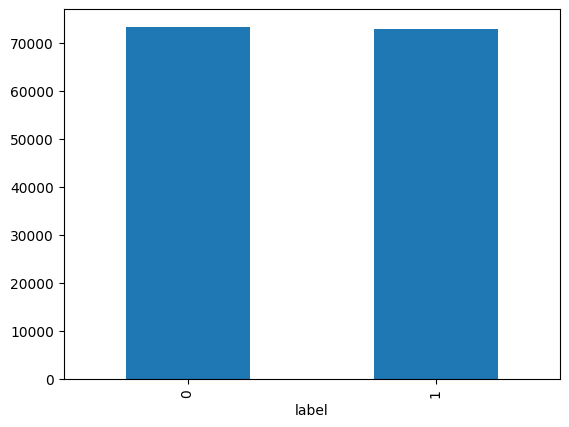

In [8]:
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')
plt.show()

In [9]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [10]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
train_data.isnull().values.any()

False

In [11]:
#특수문자,기호 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [12]:
import numpy as np

#공백 제거
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

document    0
label       0
dtype: int64

In [13]:
train_data.loc[train_data.document.isnull()][:3]

,document,label


In [14]:
#null 샘플 제거
train_data = train_data.dropna(how = 'any')
len(train_data)

146157

In [15]:
# test_data에도 동일한 과정 적용
test_data.drop_duplicates(subset = ['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
len(test_data)

49147

In [16]:
# 불용어 사전
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과',
             '도','를','으로','자','에','와','한','하다']

In [17]:
from konlpy.tag import Okt

okt = Okt()
X_train = []  

#형태소 분석
#for sentence in train_data['document']:
for sentence in train_data['document'][:10000]:    
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [18]:
print(X_train[:3])

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [19]:
# 테스트 데이터에 대한 토큰화
X_test = []

#for sentence in test_data['document']:
for sentence in test_data['document'][:10000]:    
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)

In [21]:
# 출현빈도가 3회 미만인 단어들
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기
print(rare_cnt) #희귀단어수

13345
8891


In [22]:
vocab_size = total_cnt - rare_cnt + 1

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [23]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
print(X_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [25]:
y_train = np.array(train_data['label'][:10000])
y_test = np.array(test_data['label'][:10000])

In [26]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이

In [27]:
cnt = 0

for s in X_train:
  if(len(s) <= 30):
      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율
(cnt / len(X_train))*100

93.58

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length = max_len))
model.add(Conv1D(filters = 64, kernel_size = 5, padding = 'same',activation = 'relu', strides = 1))
model.add(Conv1D(filters = 32, kernel_size = 4, padding = 'same',activation = 'relu', strides = 1))
model.add(Conv1D(filters = 16, kernel_size = 3, padding = 'same',activation = 'relu', strides = 1))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 100)           445500    
                                                                 
 conv1d (Conv1D)             (None, 59, 64)            32064     
                                                                 
 conv1d_1 (Conv1D)           (None, 59, 32)            8224      
                                                                 
 conv1d_2 (Conv1D)           (None, 59, 16)            1552      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 16)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 176)               0         
                                                        

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('./data/CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10


: 

: 

In [ ]:
loaded_model = load_model('./data/CNN_model.h5')
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4319 - acc: 0.8031


In [ ]:
def review_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측

  if(score > 0.5):
    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")

  else:
    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [ ]:
review_predict('연기는 잔잔하게 볼 만 합니다')

: 

: 

In [ ]:
review_predict('영화의 주제가 뭔지 모르겠음')

In [ ]:
review_predict('익살스런 연기가 돋보였던 영화')

In [ ]:
review_predict('기대보다는 스토리가 큰 감흥은 없습니다')